<a href="https://colab.research.google.com/github/VaughnnIvan/ADVANCED-PREDICTIVE-ANALYTICS-/blob/main/Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [46]:
df = pd.read_csv("https://raw.githubusercontent.com/haber021/Projet_01/main/AEP_hourly.csv")

In [47]:
df = df.set_index('Datetime')
df.index=pd.to_datetime(df.index)

In [48]:
df.head(10)

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
2004-12-31 06:00:00,13038.0
2004-12-31 07:00:00,13692.0
2004-12-31 08:00:00,14297.0
2004-12-31 09:00:00,14719.0


<Axes: title={'center': 'PJME Energy Use in MW'}, xlabel='Datetime'>

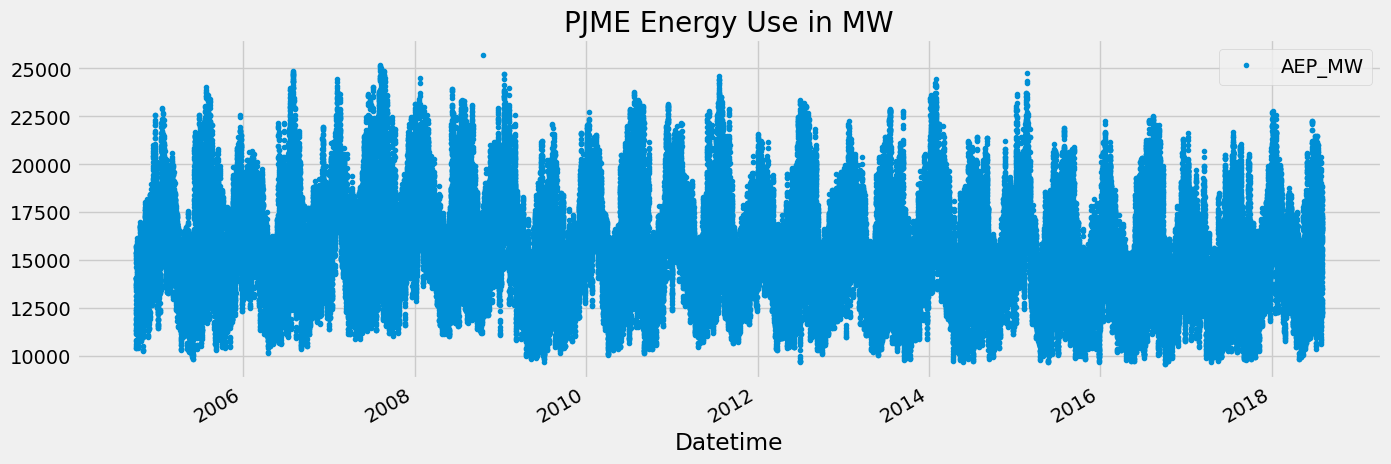

In [49]:
df.plot(style='.', figsize=(15, 5), color=color_pal[0], title='PJME Energy Use in MW')

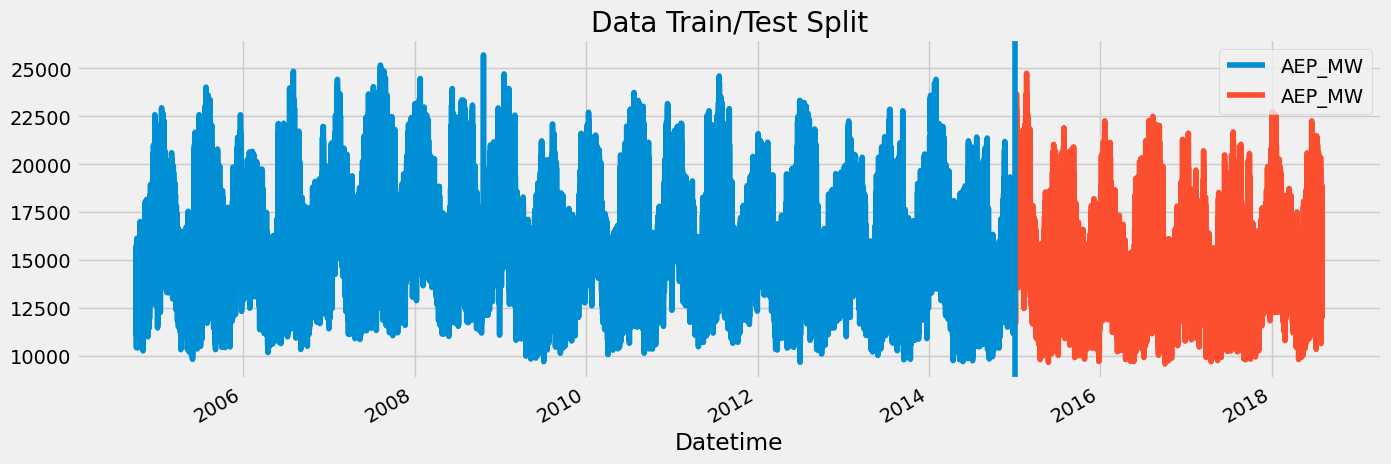

In [59]:
train =df.loc[df.index < '01-01-2015']
test = df.loc[df.index >='01-01-2015']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label = 'Traning set', title = 'Data Train/Test Split')
test.plot(ax=ax, label='Test set')
ax.axvline('01-01-2015')
plt.show()

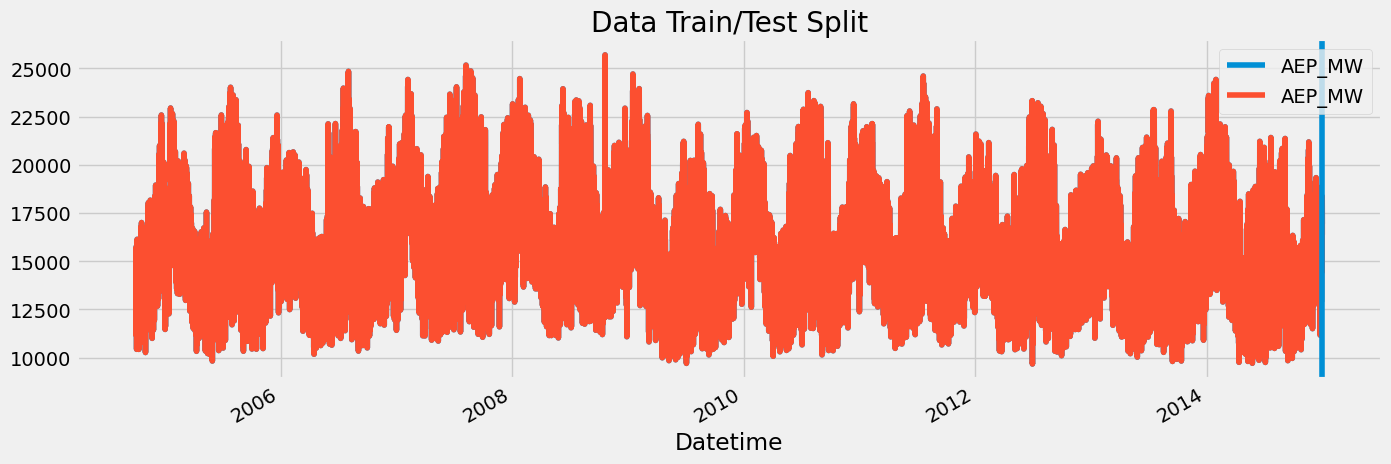

In [60]:

train =df.loc[df.index < '01-01-2015']
test = df.loc[df.index <='01-01-2015']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label = 'Traning set', title = 'Data Train/Test Split')
test.plot(ax=ax, label='Test set')
ax.axvline('01-01-2015')
plt.show()

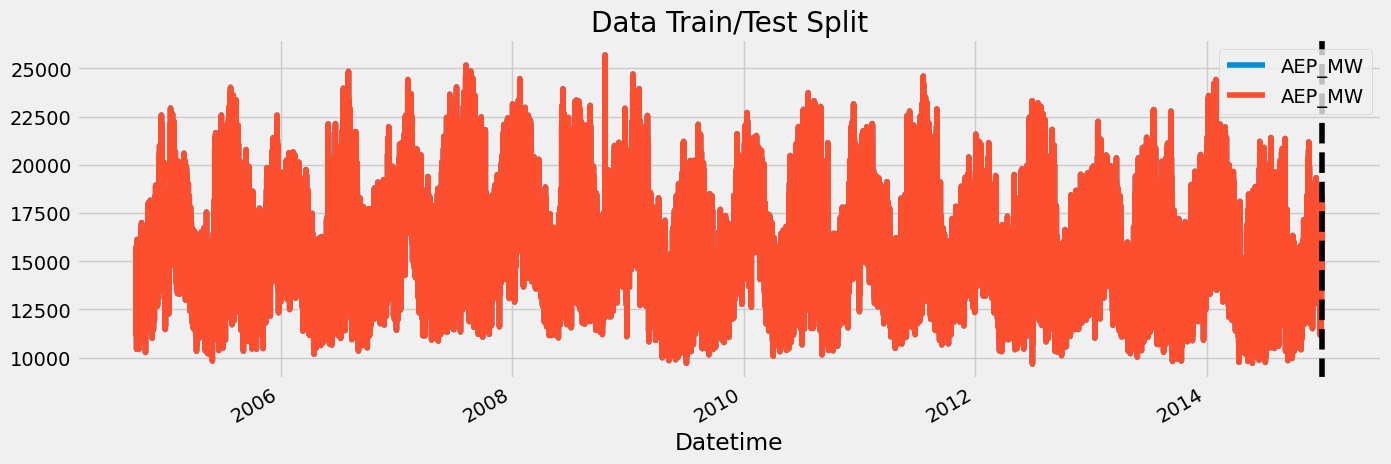

In [62]:

train =df.loc[df.index < '01-01-2015']
test = df.loc[df.index <='01-01-2015']

fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax, label = 'Traning set', title = 'Data Train/Test Split')
test.plot(ax=ax, label='Test set')
ax.axvline('01-01-2015',color='black', ls='--')
plt.show()

In [77]:
def create_features(df):

 df['hour']=df.index.hour
 df['dayofweek']=df.index.dayofweek
 df['quarter']=df.index.quarter
 df['month']=df.index.month
 df['dayofyear']=df.index.dayofyear

 return df

df=create_features(df)

<Axes: xlabel='hour', ylabel='AEP_MW'>

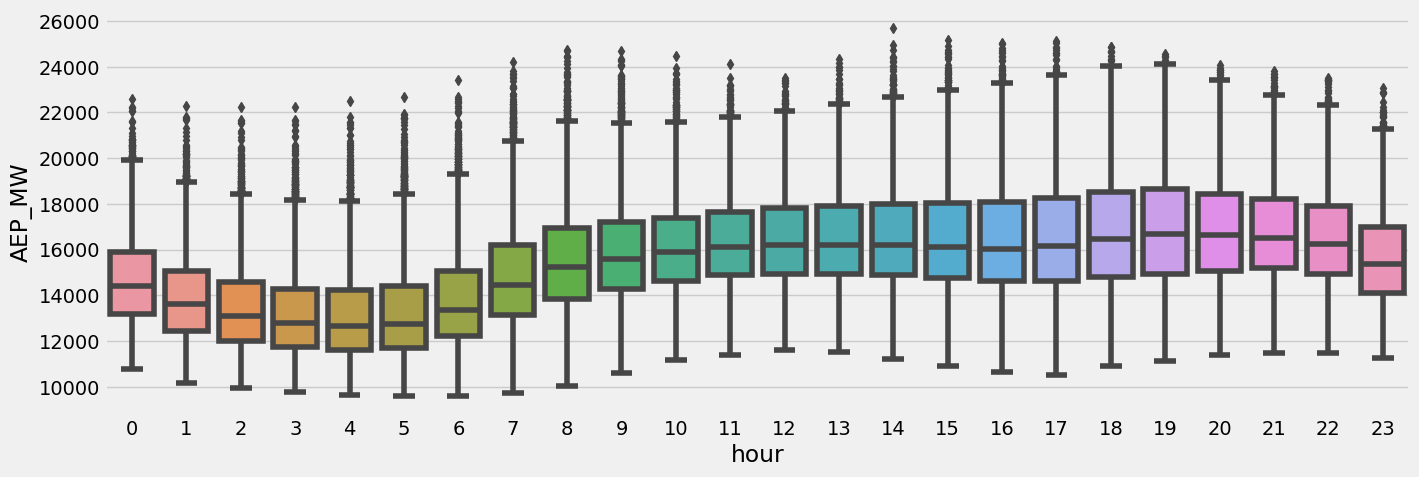

In [87]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=df, x = 'hour', y = 'AEP_MW')

In [91]:
train = create_features(train)
test =  create_features(test)

FEATURES = ['hour','dayofweek','quarter','month','dayofyear']
TARGETS = 'AEP_MW'

<ipython-input-77-d8e0d72369d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour']=df.index.hour
<ipython-input-77-d8e0d72369d4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek']=df.index.dayofweek
<ipython-input-77-d8e0d72369d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [92]:
x_train = train[FEATURES]
y_train = train[TARGETS]

x_test = test[FEATURES]
y_test = test[TARGETS]

In [96]:
from re import VERBOSE
reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,
                       learning_rate=0.01)
reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:2557.15459	validation_1-rmse:2557.14121
[100]	validation_0-rmse:1680.25073	validation_1-rmse:1680.24315
[200]	validation_0-rmse:1459.53464	validation_1-rmse:1459.52794
[300]	validation_0-rmse:1382.65967	validation_1-rmse:1382.65331
[400]	validation_0-rmse:1344.38359	validation_1-rmse:1344.37718
[500]	validation_0-rmse:1322.33797	validation_1-rmse:1322.33148
[600]	validation_0-rmse:1308.07535	validation_1-rmse:1308.06872
[700]	validation_0-rmse:1298.14271	validation_1-rmse:1298.13584
[800]	validation_0-rmse:1289.82039	validation_1-rmse:1289.81339
[900]	validation_0-rmse:1279.77035	validation_1-rmse:1279.76333
[999]	validation_0-rmse:1268.92519	validation_1-rmse:1268.91819


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

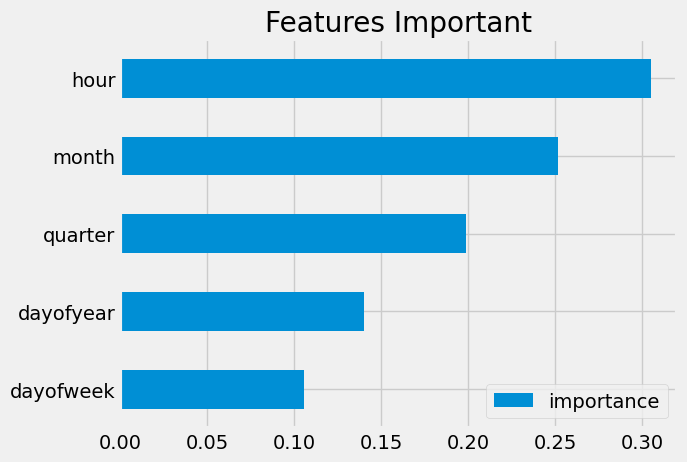

In [97]:
fi = pd.DataFrame(data=reg.feature_importances_,
                  index=reg.feature_names_in_,
                  columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Features Important')
plt.show()

In [98]:
reg.predict(x_test)

array([14645.643, 14302.906, 14120.591, ..., 19114.059, 18244.635,
       16256.397], dtype=float32)

In [99]:
test['prediction']=reg.predict(x_test)

<ipython-input-99-225bf1a78a90>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction']=reg.predict(x_test)


In [100]:
df.head(10)

,AEP_MW,hour,dayofweek,quarter,month,dayofyear
Datetime,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,366
2004-12-31 02:00:00,12865.0,2,4,4,12,366
2004-12-31 03:00:00,12577.0,3,4,4,12,366
2004-12-31 04:00:00,12517.0,4,4,4,12,366
2004-12-31 05:00:00,12670.0,5,4,4,12,366
2004-12-31 06:00:00,13038.0,6,4,4,12,366
2004-12-31 07:00:00,13692.0,7,4,4,12,366
2004-12-31 08:00:00,14297.0,8,4,4,12,366
2004-12-31 09:00:00,14719.0,9,4,4,12,366


In [105]:
df.merge(test, how='left', left_index=True, right_index=True)

,AEP_MW_x,hour_x,dayofweek_x,quarter_x,month_x,dayofyear_x,prediction_x,AEP_MW_y,hour_y,dayofweek_y,quarter_y,month_y,dayofyear_y,prediction_y
Datetime,,,,,,,,,,,,,,
2004-10-01 01:00:00,12379.0,1,4,4,10,275,12711.333984,12379.0,1.0,4.0,4.0,10.0,275.0,12711.333984
2004-10-01 02:00:00,11935.0,2,4,4,10,275,12232.576172,11935.0,2.0,4.0,4.0,10.0,275.0,12232.576172
2004-10-01 03:00:00,11692.0,3,4,4,10,275,12030.087891,11692.0,3.0,4.0,4.0,10.0,275.0,12030.087891
2004-10-01 04:00:00,11597.0,4,4,4,10,275,12011.203125,11597.0,4.0,4.0,4.0,10.0,275.0,12011.203125
2004-10-01 05:00:00,11681.0,5,4,4,10,275,12092.722656,11681.0,5.0,4.0,4.0,10.0,275.0,12092.722656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-02 20:00:00,17673.0,20,3,3,8,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-02 21:00:00,17303.0,21,3,3,8,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-02 22:00:00,17001.0,22,3,3,8,214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

<ipython-input-110-8b22b4fecdb4>:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'prediction_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)


In [112]:
test['prediction'] = reg.predict(x_test)
df = df.merge(test[['prediction']], how='left', left_index=True, right_index=True)

<ipython-input-112-272ebab184de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['prediction'] = reg.predict(x_test)


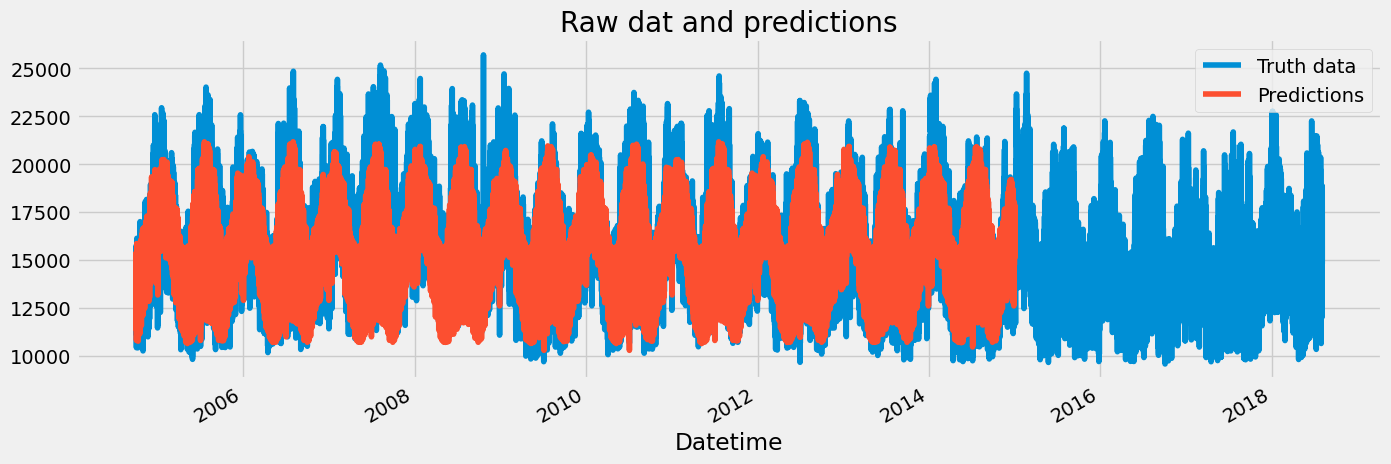

In [113]:
ax = df[['AEP_MW']].plot(figsize=(15, 5))
df['prediction'].plot(ax=ax, style ='-')
plt.legend(['Truth data', 'Predictions'])
ax.set_title('Raw dat and predictions')
plt.show()

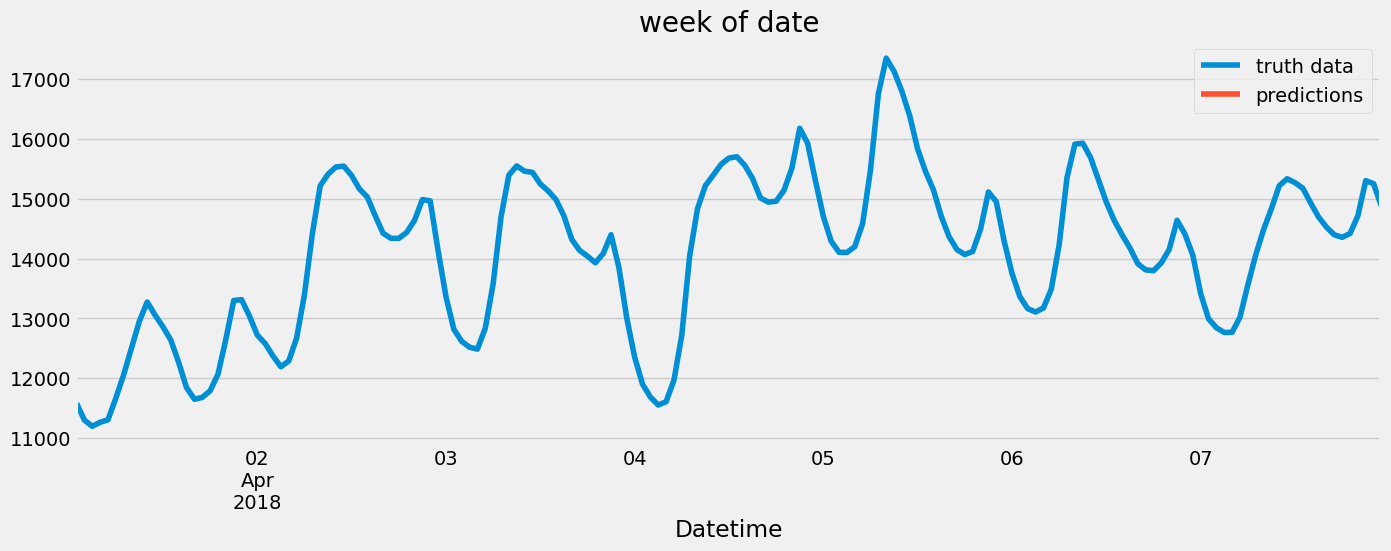

In [114]:
ax = df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['AEP_MW'].plot(figsize=(15, 5), title='week of date')
df.loc[(df.index > '04-01-2018') & (df.index < '04-08-2018')]['prediction'].plot(style='-')
plt.legend(['truth data', 'predictions'])
plt.show()